# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [64]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

import matplotlib as mpl
import matplotlib.font_manager as fm
np.random.seed(0)
global_seed = 0

pic_path = ''

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Import data**

In [65]:
df_orig = pandas.read_csv('../data/Chefbot_Dataset - All.csv', encoding='utf-8')

In [66]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
572,สปาเก็ตตี้ที่มีสีแดง และเขียวตัดกับ สีของเส้นท...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
573,ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อ หมู ไก...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
574,สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลั...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
575,สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึ...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล


# **Data Preprocessing**

In [67]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [68]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเก็ตตี้'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเก็ตตี้มีทบอล', 'สปาเก็ตตี้คาโบนาร่า',
       'สปาเก็ตตี้ผัก', 'สปาเก็ตตี้ทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [69]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Remove unwanted character**

#### **Front-Back white space**

In [70]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [71]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [72]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [73]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

In [74]:
mainclass_label_map, reversed_mainclass_label_map = get_label_map(df_prepro, 'Mainclass')

display(mainclass_label_map)

df_prepro['Mainclass'] = df_prepro['Mainclass'].map(mainclass_label_map)

display(df_prepro.head())

{'พิซซ่า': 0, 'ก๋วยเตี๋ยว': 1, 'สปาเก็ตตี้': 2}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,ค็อกเทลกุ้ง


#### **Get sub class labels**

In [75]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเก็ตตี้มีทบอล': 8,
 'สปาเก็ตตี้คาโบนาร่า': 9,
 'สปาเก็ตตี้ผัก': 10,
 'สปาเก็ตตี้ทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,0


## **Data Visualization**

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
def plot_sentence_length_distribution(df, col_name):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (12, 8)
    
    bin_size = 5
    bins = np.arange(0, 100, bin_size)
    plt.hist(df[col_name].str.len(), bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='train')
    xticks = np.arange(0, 150, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, 100, bin_size)
    plt.yticks(yticks, yticks)
    plt.title('Sentence Length Distribution')
    plt.legend(loc='upper right')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name].str.len(), bins=bins)[0]):
        plt.text(a + 2.5, b + 2.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

### **Plotting the length of the text data**

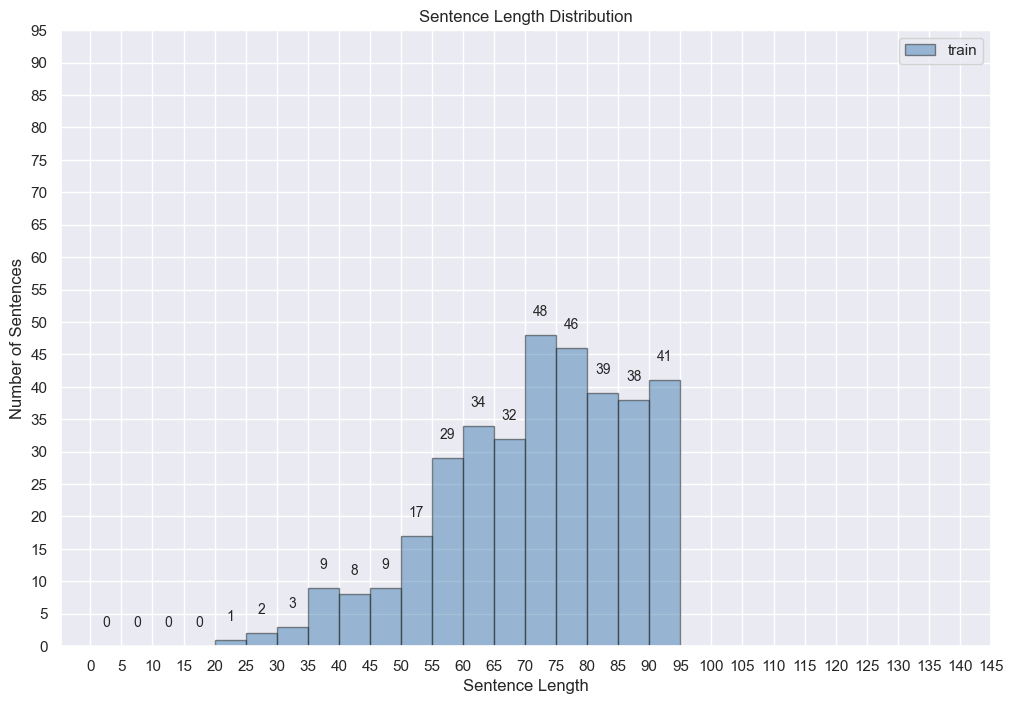

In [78]:
plot_sentence_length_distribution(df_prepro, 'Text')

#### **Maximum length of text inputs**

In [79]:
print('Max sentence length: %d' % df_prepro['Text'].str.len().max())

df_prepro['Text'].str.len().describe()

Max sentence length: 165


count    576.000000
mean      88.333333
std       26.587477
min       20.000000
25%       69.750000
50%       86.000000
75%      107.000000
max      165.000000
Name: Text, dtype: float64

### **Plot the distribution of labels**

In [80]:
def plot_label_distribution(df, col_name, title):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (6, 4)
    
    bin_size = 1
    bins = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.hist(df[col_name], bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='data')
    xticks = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, df[col_name].value_counts().max() + 100, 500)
    plt.yticks(yticks, yticks)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('Object')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name], bins=bins)[0]):
        plt.text(a + 0.5, b + 0.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

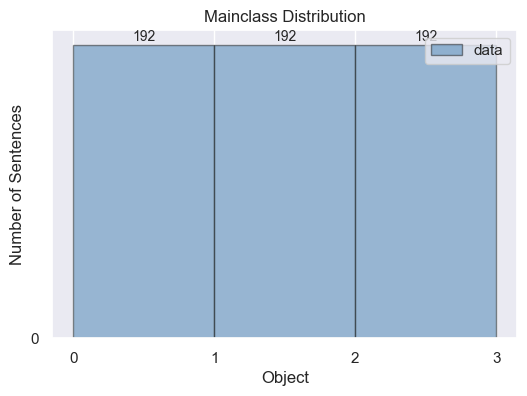

In [81]:
plot_label_distribution(df_prepro, 'Mainclass', 'Mainclass Distribution')

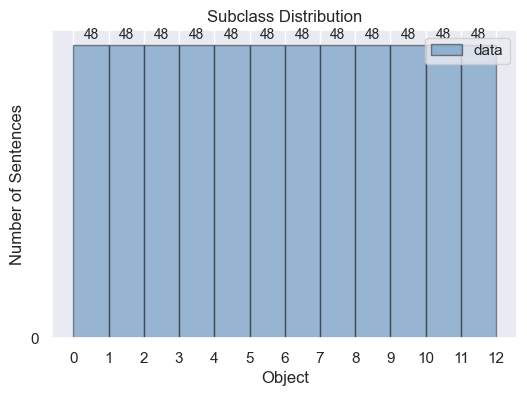

In [82]:
plot_label_distribution(df_prepro, 'Subclass', 'Subclass Distribution')

# **Keras Preprocessing**

In [83]:
df_keras = df_prepro.copy()

In [84]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        0, 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        0, 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        0, 0],
       ...,
       ['ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        2, 11],
       ['สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 2, 11],
       ['สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        2, 11]], dtype=object)

## **Word Tokenization**

In [85]:
import pythainlp
from pythainlp import word_tokenize
from keras.utils import pad_sequences

In [86]:
input_tokenize = df_keras.copy()
for i, sentence in enumerate(input_tokenize[:, 0]):
    input_tokenize[i, 0] = np.array(word_tokenize(sentence, engine='newmm'), dtype=object)

input_tokenize = np.asarray(input_tokenize, dtype=object)

max_len = max(len(seq) for seq in input_tokenize[:, 0]) + 10

for i in range(len(input_tokenize)):
    input_tokenize[i, 0] = np.pad(input_tokenize[i, 0], (0, max_len - len(input_tokenize[i, 0])), constant_values=" ")

print("Example after padding:")
print(input_tokenize[500])

print(f"Data shape: {input_tokenize.shape}")

for seq in input_tokenize[:, 0]:
    if seq.shape[0] != 50:
        print("ไม่เท่ากับ 50")

print("เท่ากับ 50")

Example after padding:
[array(['อยาก', 'กิน', 'อะไร', 'ก็', 'ได้ที่', 'มี', 'ชีส', 'ผัก', 'เพราะ',
        'กิน', 'คีโม', 'ขอ', 'เมนู', 'ทำ', 'ง่าย', 'ใช้เวลา', 'ไม่', 'นาน',
        'มี', 'สารอาหาร', 'พวก', 'คา', 'โบ', 'ไฮ', 'เด', 'รต', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)
 2 10]
Data shape: (576, 3)
เท่ากับ 50


In [87]:
sentence = input_tokenize[:, 0]
mainclass_labels = input_tokenize[:, 1]
subclass_labels = input_tokenize[:, 2]

print(f'Example sentence: {sentence[0]}')
print(f'Example mainclass label: {mainclass_labels[0]}')
print(f'Example subclass label: {subclass_labels[0]}')

print('Shape')
print(f'Sentence: {sentence.shape}')
print(f'Mainclass label: {mainclass_labels.shape}')
print(f'Subclass label: {subclass_labels.shape}')

Example sentence: ['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Example mainclass label: 0
Example subclass label: 0
Shape
Sentence: (576,)
Mainclass label: (576,)
Subclass label: (576,)


## **Word Count**

In [88]:
from collections import Counter

word_counts = Counter()
for data in input_tokenize[:,0]:
    word_counts.update(data)
    
display(word_counts.most_common(15))

[(' ', 16726),
 ('มี', 630),
 ('ที่', 580),
 ('กิน', 360),
 ('และ', 325),
 ('เป็น', 251),
 ('อาหาร', 235),
 ('เส้น', 220),
 ('ได้', 185),
 ('อยาก', 160),
 ('กับ', 144),
 ('ไม่', 140),
 ('ของ', 134),
 ('รสชาติ', 132),
 ('ผัก', 125)]

In [89]:
# Find maximym vocabulary size
max_vocab_size = len(word_counts) + 1 # +1 for unknown token
print(f'Maximum vocabulary size from data set: {max_vocab_size}')
# Find maximum sentence length
max_len = max([len(sentence) for sentence in input_tokenize[:,0]])
print(f'Maximum sentence length from data set: {max_len}')

# Set parameters
max_vocab_size = 5000 # Set maximum vocabulary size to 5000 word (including unknown token)
max_len = 50 # Set maximum sentence length to 50 word per input text

Maximum vocabulary size from data set: 1267
Maximum sentence length from data set: 50


## **Word Vectorization**

In [90]:
sentence[0]

array(['อยาก', 'กิน', 'กุ้ง', 'ที่จะ', 'มี', 'ความ', 'หนุบ', 'กับ',
       'น้ำสลัด', 'เทา', 'ซัน', 'ไอส์แลนด์', 'ที่', 'มี', 'ความ',
       'เข้มข้น', 'หอม', 'แป้ง', 'เยอะ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [91]:
from pythainlp import word_vector
wordVector = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [92]:
def map_word_to_vector(word):
    try:
        return wordVector[word]
    except KeyError:
        return np.zeros(wordVector.vector_size)

sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,0]],dtype=object)

print(f'Sentence vector shape: {sentence_vector.shape}')

Sentence vector shape: (576, 50, 300)


In [93]:
sentence_vector[0].shape

(50, 300)

In [94]:
sentence_vector[0][0].shape

(300,)

### **One-hot encoding**

In [95]:
from keras.utils import to_categorical

mainclass_labels = to_categorical(mainclass_labels)
subclass_labels = to_categorical(subclass_labels)

print('Mainclass labels shape:', mainclass_labels.shape)
print('Subclass labels shape:', subclass_labels.shape)

Mainclass labels shape: (576, 3)
Subclass labels shape: (576, 12)


## **Train-Test Split**

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_main_class, y_test_main_class, y_train_sub_class, y_test_sub_class = train_test_split(sentence_vector, mainclass_labels, subclass_labels, train_size=0.8, shuffle=True)


In [97]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train_main_class shape: {y_train_main_class.shape}')
print(f'y_train_sub_class shape: {y_train_sub_class.shape}')
print('-----------------------------------------')
print(f'X_test shape: {X_test.shape}')
print(f'y_test_main_class shape: {y_test_main_class.shape}')
print(f'y_test_sub_class shape: {y_test_sub_class.shape}')

X_train shape: (460, 50, 300)
y_train_main_class shape: (460, 3)
y_train_sub_class shape: (460, 12)
-----------------------------------------
X_test shape: (116, 50, 300)
y_test_main_class shape: (116, 3)
y_test_sub_class shape: (116, 12)


Converting the data from numpy array to Tensorflow Dataset

In [98]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_main_class = tf.convert_to_tensor(y_train_main_class, dtype=tf.float32)
y_test_main_class = tf.convert_to_tensor(y_test_main_class, dtype=tf.float32)
y_train_sub_class = tf.convert_to_tensor(y_train_sub_class, dtype=tf.float32)
y_test_sub_class = tf.convert_to_tensor(y_test_sub_class, dtype=tf.float32)

# **Modeling**

In [99]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.layers import Concatenate, Lambda, Reshape, RepeatVector,Multiply
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

## **Sub Class Model**

# Test model 1

In [100]:
# Test model
max_len = 50
word_vector_size = 300
main_class_label = ['class1', 'class2', 'class3']
sub_class_label = {'class1': ['sub11', 'sub12', 'sub13', 'sub14'],
                   'class2': ['sub21', 'sub22', 'sub23', 'sub24'],
                   'class3': ['sub31', 'sub32', 'sub33', 'sub34']}
# Test model
# Define inputs
text_input_layer  = Input(shape=(max_len, word_vector_size), dtype='float32', name='text_input_layer')
main_class_input_layer  = Input(shape=(len(main_class_label),), dtype='float32', name='main_class_input_layer')

# Define layers
masking_layer = Masking(mask_value=0.0)(text_input_layer)
conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(masking_layer)
bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(conv1d_layer_1)
dropout_layer_1 = Dropout(0.2)(bi_lstm_layer_1)
global_max_pooling_layer_1 = GlobalMaxPooling1D()(dropout_layer_1)

# Main class output
main_class_output_layer = Dense(len(main_class_label), activation='softmax', name='main_class_output')(global_max_pooling_layer_1)

# Argmax of main class input
main_class_input_argmax = Lambda(lambda x: K.argmax(x))(main_class_input_layer)

# Sub class output
sub_class_output_layers = {}
for main_class in main_class_label:
    # Create binary mask that is 1 only when the main class is correct
    # Current shpae of main class input argmax is (None, )
    binary_mask = K.cast(K.equal(main_class_input_argmax, main_class_label.index(main_class)), dtype='float32')
    # Reshape the binary mask to (None, 1)
    reshape_binary_mask = Reshape((-1,))(binary_mask)
    # Repeat the binary mask to (None, 16, 1)
    repeat_binary_mask = RepeatVector(16)(reshape_binary_mask)
    # Reshape the binary mask to (None, 16)
    reshape_repeat_binary_mask = Reshape((16,))(repeat_binary_mask)
    
    # Define dense layer for each sub class outputs
    dense_layer = Dense(16, activation='relu')(global_max_pooling_layer_1)

    # Apply the binary mask to the dense layer output
    masked_dense_layer = Multiply()([dense_layer, reshape_repeat_binary_mask])

    # Define the sub class output layer
    sub_class_output_layer = Dense(len(sub_class_label[main_class]), activation='softmax', name=f'{main_class}_output')(masked_dense_layer)

    # Add the masked dense layer to the sub class output dictionary
    sub_class_output_layers[main_class] = sub_class_output_layer

# Concatenate all sub class output layers
concat_sub_class_output_layers = Concatenate(name = 'sub_class_output')(list(sub_class_output_layers.values()))

# Define the model
model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[main_class_output_layer, concat_sub_class_output_layers])

loss = {'main_class_output': 'categorical_crossentropy',
         'sub_class_output': 'categorical_crossentropy'}
loss_weights = {'main_class_output': 1.0,
                'sub_class_output': 1.0}
metrics = {'main_class_output': 'accuracy',
            'sub_class_output': 'accuracy'}
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)

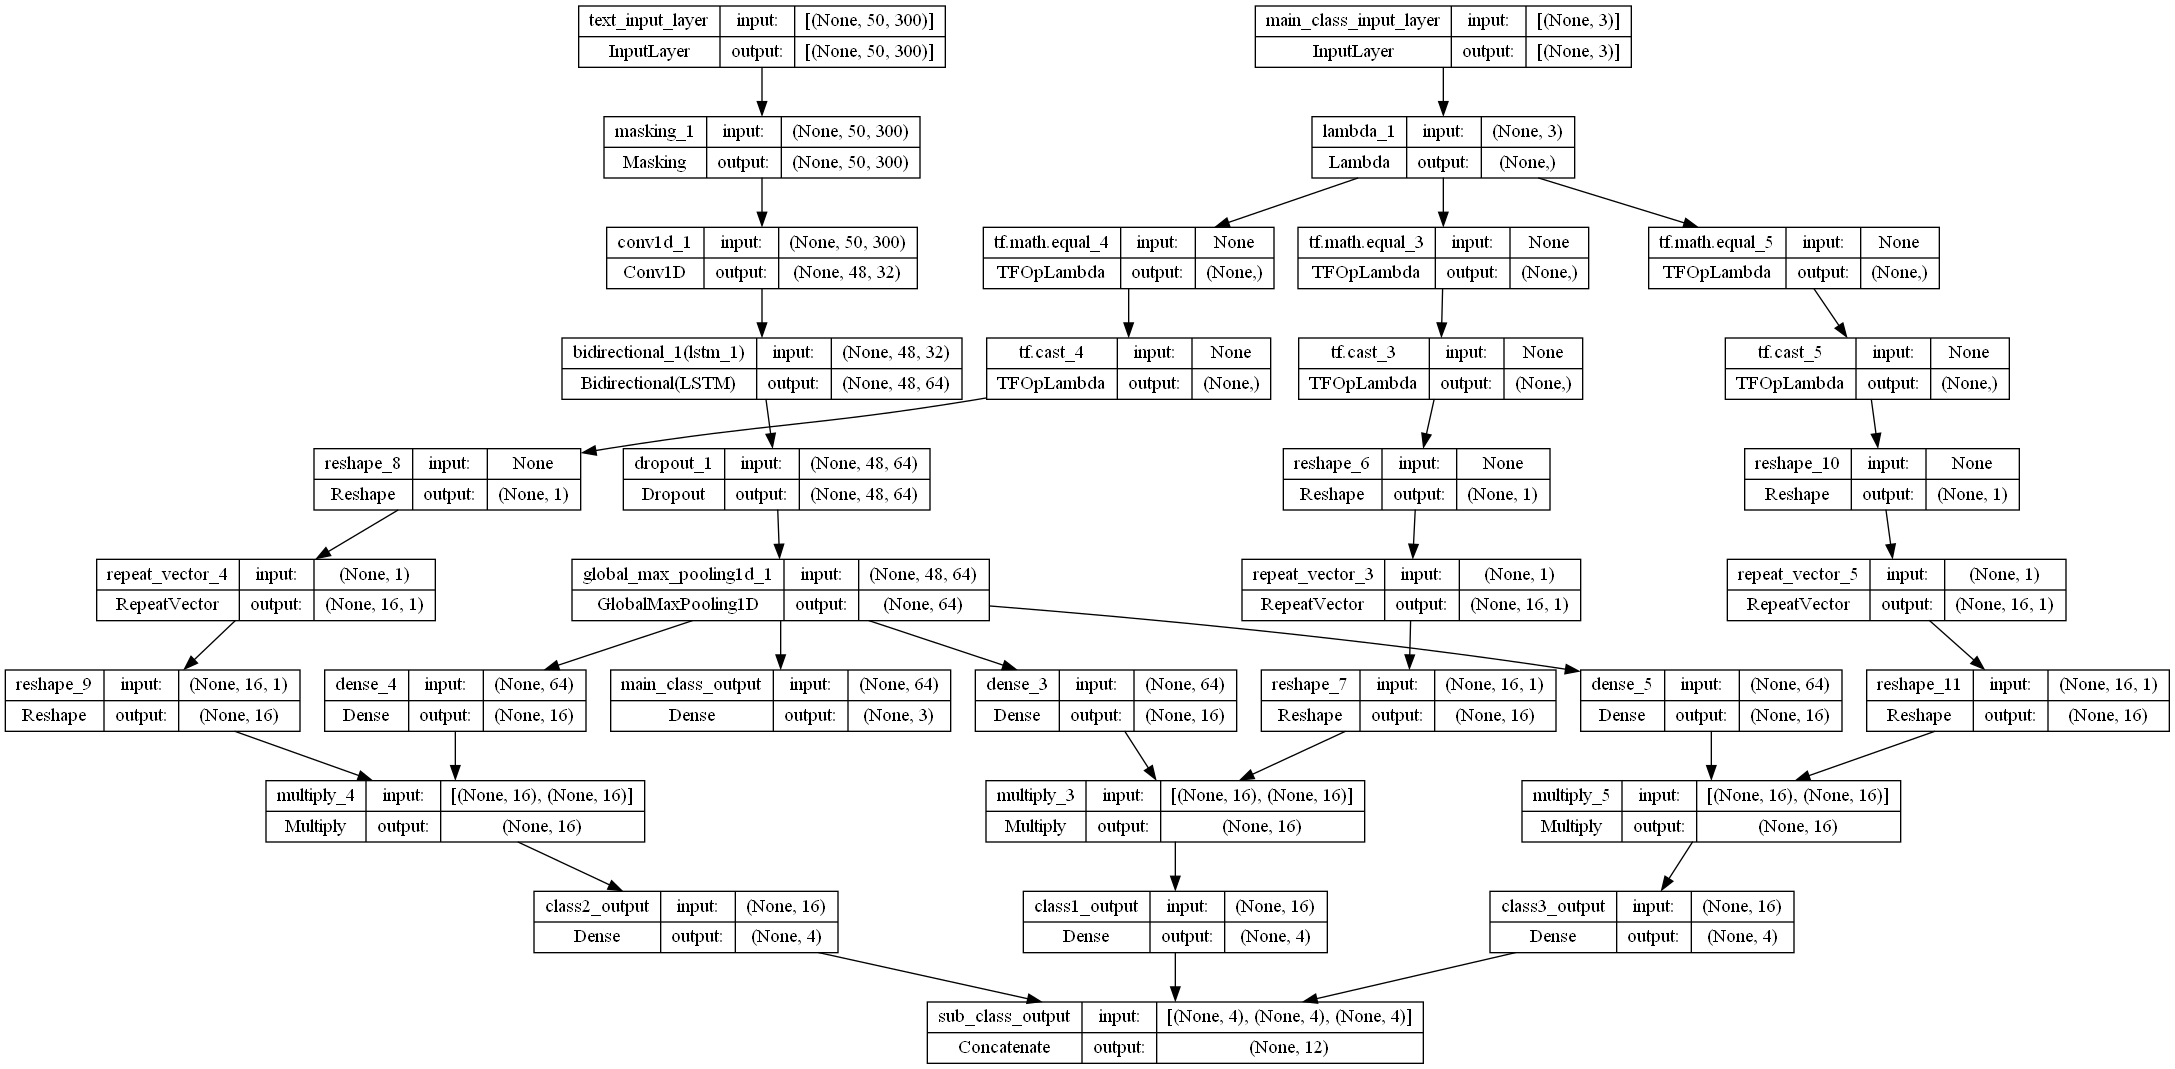

In [101]:
plot_model(model, to_file=pic_path+'modeltest.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [102]:
model.fit(
    x = {'text_input_layer': X_train, 'main_class_input_layer': y_train_main_class},
    y = {'main_class_output': y_train_main_class,
         'sub_class_output': y_train_sub_class},
    epochs = 10,
    batch_size = 4,
    verbose = 1,
    )

Epoch 1/10
115/115 [==============================] - 4s 14ms/step - loss: 3.5515 - main_class_output_loss: 1.0589 - sub_class_output_loss: 2.4927 - main_class_output_accuracy: 0.4348 - sub_class_output_accuracy: 0.2761
Epoch 2/10
115/115 [==============================] - 2s 17ms/step - loss: 3.2622 - main_class_output_loss: 0.7986 - sub_class_output_loss: 2.4636 - main_class_output_accuracy: 0.6783 - sub_class_output_accuracy: 0.3109
Epoch 3/10
115/115 [==============================] - 2s 19ms/step - loss: 2.9510 - main_class_output_loss: 0.5170 - sub_class_output_loss: 2.4340 - main_class_output_accuracy: 0.8109 - sub_class_output_accuracy: 0.3609
Epoch 4/10
115/115 [==============================] - 2s 19ms/step - loss: 2.6918 - main_class_output_loss: 0.3319 - sub_class_output_loss: 2.3599 - main_class_output_accuracy: 0.8957 - sub_class_output_accuracy: 0.4609
Epoch 5/10
115/115 [==============================] - 2s 18ms/step - loss: 2.4658 - main_class_output_loss: 0.2395 - sub

# Evaluate model 

In [103]:
y_pred_main_class, y_pred_sub_class = model.predict({'text_input_layer': X_test, 'main_class_input_layer': y_test_main_class})

4/4 [==============================] - 1s 10ms/step


In [104]:
y_pred_main_class_plot = np.argmax(y_pred_main_class, axis=1)
y_pred_sub_class_plot = np.argmax(y_pred_sub_class, axis=1)

y_test_main_class_plot = np.argmax(y_test_main_class, axis=1)
y_test_sub_class_plot = np.argmax(y_test_sub_class, axis=1)

In [105]:
print(classification_report(y_pred_main_class_plot, y_test_main_class_plot))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73        52
           1       0.62      0.96      0.76        26
           2       0.77      0.87      0.81        38

    accuracy                           0.77       116
   macro avg       0.78      0.81      0.77       116
weighted avg       0.81      0.77      0.76       116



In [106]:
print(classification_report(y_pred_sub_class_plot, y_test_sub_class_plot))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.62      0.56      0.59         9
           2       0.62      0.45      0.53        11
           3       0.50      0.75      0.60         4
           4       0.23      0.60      0.33         5
           5       0.50      0.75      0.60         8
           6       0.43      0.23      0.30        13
           7       0.88      0.50      0.64        14
           8       0.50      0.31      0.38        13
           9       0.00      0.00      0.00         0
          10       0.64      0.41      0.50        22
          11       0.55      0.75      0.63         8

    accuracy                           0.50       116
   macro avg       0.51      0.51      0.48       116
weighted avg       0.59      0.50      0.52       116



b:\miniconda\envs\tf_ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
b:\miniconda\envs\tf_ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
b:\miniconda\envs\tf_ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

<Figure size 1000x1000 with 0 Axes>

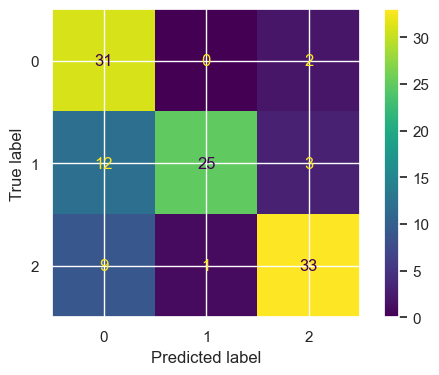

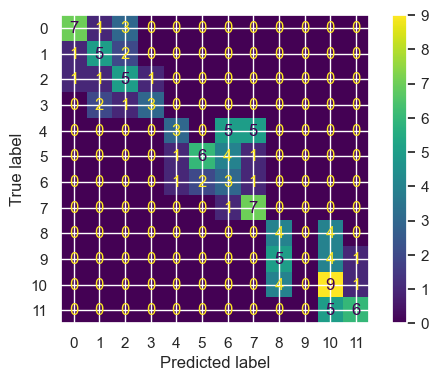

In [107]:
plt.figure(figsize=(10,10))

cm1 = confusion_matrix(y_test_main_class_plot, y_pred_main_class_plot)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()

cm2 = confusion_matrix(y_test_sub_class_plot, y_pred_sub_class_plot)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()